In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read the data
df=pd.read_csv("IMD_QuarterDegree_DailyRainfall_1825_7875 (3).csv")
df

,DateTime,18.25 78.75
0,1950-01-01,0.0
1,1950-01-02,0.0
2,1950-01-03,0.0
3,1950-01-04,0.0
4,1950-01-05,0.0
...,...,...
26293,2021-12-27,0.0
26294,2021-12-28,0.0
26295,2021-12-29,0.0
26296,2021-12-30,0.0


In [3]:
df['Year']=pd.to_datetime(df['DateTime']).dt.year
df['Rainfall']=df['18.25 78.75']
df.drop('18.25 78.75',axis=1,inplace=True)
df

,DateTime,Year,Rainfall
0,1950-01-01,1950,0.0
1,1950-01-02,1950,0.0
2,1950-01-03,1950,0.0
3,1950-01-04,1950,0.0
4,1950-01-05,1950,0.0
...,...,...,...
26293,2021-12-27,2021,0.0
26294,2021-12-28,2021,0.0
26295,2021-12-29,2021,0.0
26296,2021-12-30,2021,0.0


In [4]:
yearly_total=df.groupby('Year')['Rainfall'].sum()
yearly_total=pd.DataFrame({'year':yearly_total.index,'rainfall':yearly_total.values})
yearly_total

,year,rainfall
0,1950,837.6853
1,1951,710.2512
2,1952,642.6455
3,1953,1130.0085
4,1954,720.3110
...,...,...
67,2017,826.0344
68,2018,657.0290
69,2019,1300.8636
70,2020,1785.4657


In [5]:
# To calculate the yearly auto corelation with 1 year shift
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Year']=df['DateTime'].dt.year
yearly_total['laggedyear']=yearly_total['rainfall'].shift(-1)
yearly_total

,year,rainfall,laggedyear
0,1950,837.6853,710.2512
1,1951,710.2512,642.6455
2,1952,642.6455,1130.0085
3,1953,1130.0085,720.3110
4,1954,720.3110,1038.0770
...,...,...,...
67,2017,826.0344,657.0290
68,2018,657.0290,1300.8636
69,2019,1300.8636,1785.4657
70,2020,1785.4657,1535.1258


In [6]:
corr_yearly=yearly_total['rainfall'].corr(yearly_total['laggedyear']) #pearson correlation coefficient
corr_yearly #daily autocorrelation

0.2066571640188928

In [7]:
df['Month']=pd.to_datetime(df['DateTime']).dt.month
monthly_total=df.groupby('Month')['Rainfall'].sum()
monthly_total=pd.DataFrame({'month':monthly_total.index,'rainfall':monthly_total.values})
monthly_total

,month,rainfall
0,1,666.0183
1,2,500.5530
2,3,1052.3034
3,4,1341.7758
4,5,1507.3114
5,6,9024.8583
6,7,14593.4911
7,8,13258.4772
8,9,11230.9729
9,10,5865.1155


In [8]:
# To calculate the monthly auto corelation with 12 month shift
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Month']=df['DateTime'].dt.month
monthly_total['laggedmonth']=monthly_total['rainfall'].shift(-1)
monthly_total

,month,rainfall,laggedmonth
0,1,666.0183,500.5530
1,2,500.5530,1052.3034
2,3,1052.3034,1341.7758
3,4,1341.7758,1507.3114
4,5,1507.3114,9024.8583
5,6,9024.8583,14593.4911
6,7,14593.4911,13258.4772
7,8,13258.4772,11230.9729
8,9,11230.9729,5865.1155
9,10,5865.1155,1413.7157


In [9]:
corr_monthly=monthly_total['rainfall'].corr(monthly_total['laggedmonth']) #pearson correlation coefficient
corr_monthly #daily autocorrelation

0.7669011854213056

In [10]:
df['Day']=df['DateTime'].dt.day
daily_total=df.groupby('Day')['Rainfall'].sum()
daily_total=pd.DataFrame({'days':daily_total.index,'rainfall':daily_total.values})
daily_total

,days,rainfall
0,1,1861.8584
1,2,2050.6670
2,3,1946.1843
3,4,2168.5566
4,5,1976.9673
5,6,1882.9717
6,7,1906.8608
7,8,1844.5821
8,9,1851.0787
9,10,2148.0334


In [11]:
# To calculate the daily auto corelation with 365 shift
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Day']=df['DateTime'].dt.day
daily_total['laggedday']=daily_total['rainfall'].shift(-1)
daily_total

,days,rainfall,laggedday
0,1,1861.8584,2050.6670
1,2,2050.6670,1946.1843
2,3,1946.1843,2168.5566
3,4,2168.5566,1976.9673
4,5,1976.9673,1882.9717
5,6,1882.9717,1906.8608
6,7,1906.8608,1844.5821
7,8,1844.5821,1851.0787
8,9,1851.0787,2148.0334
9,10,2148.0334,2119.9770


In [12]:
corr_daily=daily_total['rainfall'].corr(daily_total['laggedday']) #pearson correlation coefficient
corr_daily #daily autocorrelation

0.35852430544461744

In [13]:
def lagged(k):
    for i in range(1,k+1):
        daily_total[i]=daily_total['rainfall'].shift(-i)
    return daily_total

In [14]:
daily_total=lagged(5)
daily_total.drop('laggedday',axis=1,inplace=True)
daily_total

,days,rainfall,1,2,3,4,5
0,1,1861.8584,2050.6670,1946.1843,2168.5566,1976.9673,1882.9717
1,2,2050.6670,1946.1843,2168.5566,1976.9673,1882.9717,1906.8608
2,3,1946.1843,2168.5566,1976.9673,1882.9717,1906.8608,1844.5821
3,4,2168.5566,1976.9673,1882.9717,1906.8608,1844.5821,1851.0787
4,5,1976.9673,1882.9717,1906.8608,1844.5821,1851.0787,2148.0334
5,6,1882.9717,1906.8608,1844.5821,1851.0787,2148.0334,2119.9770
6,7,1906.8608,1844.5821,1851.0787,2148.0334,2119.9770,2164.3785
7,8,1844.5821,1851.0787,2148.0334,2119.9770,2164.3785,1841.2547
8,9,1851.0787,2148.0334,2119.9770,2164.3785,1841.2547,1780.4227
9,10,2148.0334,2119.9770,2164.3785,1841.2547,1780.4227,2053.4878


In [15]:
def corr_daily(w):
    x=[]
    for i in range(1,w+1):
        y=daily_total['rainfall'].corr(daily_total[i])
        x.append(y)
    return x

In [16]:
correlation_daily=corr_daily(5)
correlation_daily

[0.35852430544461744,
 0.18879930435584774,
 0.10975364959492677,
 -0.08261244836469295,
 0.056557235730853125]

In [17]:
correlation_chart=pd.DataFrame({'Laggeddays':[1,2,3,4,5],'Correlation':correlation_daily},columns=('Laggeddays','Correlation'))
correlation_chart

,Laggeddays,Correlation
0,1,0.358524
1,2,0.188799
2,3,0.109754
3,4,-0.082612
4,5,0.056557


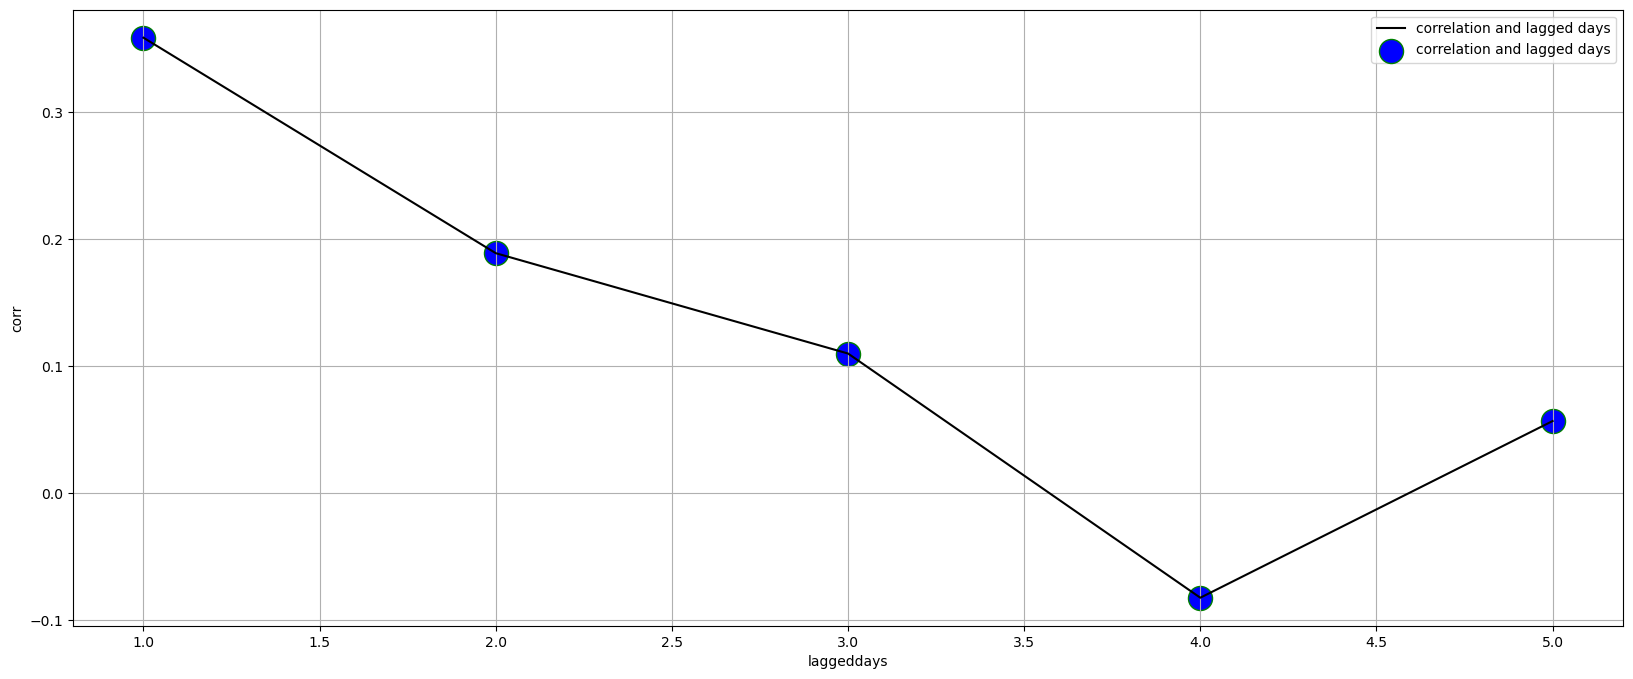

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(correlation_chart['Laggeddays'],correlation_chart['Correlation'],color='black',label='correlation and lagged days')
plt.scatter(correlation_chart['Laggeddays'],correlation_chart['Correlation'],facecolor='blue',edgecolor='green',marker='o',s=300,label='correlation and lagged days')

plt.grid()
plt.xlabel('laggeddays')
plt.ylabel('corr')
plt.legend()
plt.show()